In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Generate synthetic data
np.random.seed(42)
X1 = np.random.rand(100, 1) * 1000  # Large scale feature (0 to 1000)
X2 = np.random.rand(100, 1) * 0.1   # Small scale feature (0 to 0.1)
y = 3 * X1 + 5 * X2 + np.random.randn(100, 1) * 100  # Linear relation with noise

X = np.hstack((X1, X2))  # Combine features

In [3]:
# Train Linear Regression using Gradient Descent (Without Scaling)
reg_no_scaling = SGDRegressor(max_iter=500, learning_rate='constant', eta0=0.0001)
loss_no_scaling = []
for _ in range(100):
    reg_no_scaling.partial_fit(X, y.ravel())
    y_pred = reg_no_scaling.predict(X)
    loss_no_scaling.append(mean_squared_error(y, y_pred))

In [4]:
# Apply Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Train Linear Regression with Scaling
reg_scaled = SGDRegressor(max_iter=500, learning_rate='constant', eta0=0.0001)
loss_scaled = []
for _ in range(100):
    reg_scaled.partial_fit(X_scaled, y.ravel())
    y_pred_scaled = reg_scaled.predict(X_scaled)
    loss_scaled.append(mean_squared_error(y, y_pred_scaled))

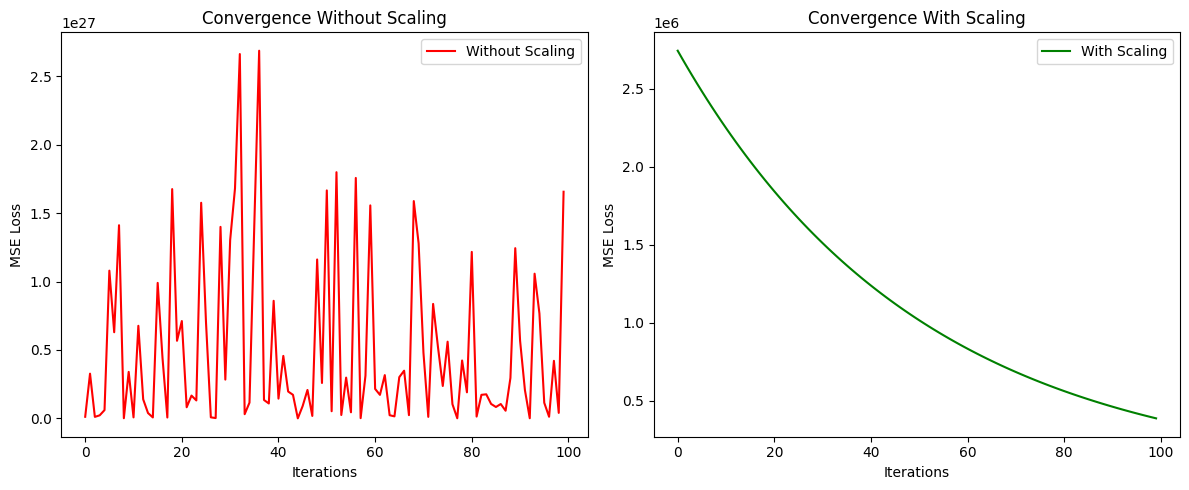

Coefficients Without Scaling: [7.32476262e+10 1.27750123e+08]
Coefficients With Scaling: [554.51051719   2.3617854 ]


In [6]:
# Plot Loss Reduction
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_no_scaling, label="Without Scaling", color='red')
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Convergence Without Scaling")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_scaled, label="With Scaling", color='green')
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Convergence With Scaling")
plt.legend()

plt.tight_layout()
plt.show()

# Print Final Coefficients
print("Coefficients Without Scaling:", reg_no_scaling.coef_)
print("Coefficients With Scaling:", reg_scaled.coef_)